In [1]:
import os
if os.name != 'posix':
    %matplotlib ipympl
else:
    %matplotlib notebook
import scipy.constants as sc
from scipy.optimize import fsolve

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix

21172
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pylib.LBFGS as bfgs

colors_ = ["blue", "red", "green", "gray", "black"]

from matplotlib import ticker
cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
# cmap_two_signs_= 'Greys'
# cmap_two_signs_= 'Pastel1'
# cmap_two_signs_= 'flag'
# cmap_two_signs_= 'nipy_spectral'
# cmap_two_signs_= 'jet'
# cmap_two_signs_= 'seismic'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

# path_save_ = "./jupyter-notebooks/NL/results/"

In [12]:
for _ in range(30):
    plt.close()

In [4]:
# ---------------------------------
# --- Test function ---
def compute_test_function():
    f_test = np.zeros(N_coord_)
    for i_coord in range(N_coord_):
        one_coord = coord_[i_coord]
        f_test[i_coord] = 0
        for i_par in range(N_pars_):
            f_test[i_coord] += pars_[i_par] * one_coord**i_par
    return f_test

# ---------------------------------
# --- Cost function ---
form_cost_     = lambda y_given, y_test: (y_given - y_test)**2
form_der_core_ = lambda y_given, y_test: (y_given - y_test)
def compute_cost_function():
    F = 0
    for i_coord in range(N_coord_):
        F += form_cost_(f_given_[i_coord], f_test_[i_coord])
    return F

# ---------------------------------------------------------------
# --- First derivative of the cost function on i-th parameter ---    
def der_1st_cost(i_par): 
    der = 0
    for i_coord in range(N_coord_):
        coord_one = coord_[i_coord]
        temp = form_der_core_(f_given_[i_coord], f_test_[i_coord])
        der += temp * coord_one**i_par
    der = 2. * der
    return der

# ---------------------------------------------------------------
# --- Second derivative of the cost function on i1-th and i2-th parameter ---
def der_2nd_cost(i_par_1, i_par_2):
    der_2d = 0
    for i_coord in range(N_coord_):
        coord_one = coord_[i_coord]
        der_2d += coord_one**i_par_1 * coord_one**i_par_2
    der_2d = 2. * der_2d
    return der_2d

# ---------------------------------
# --- Hessian matrix ---
def form_hessian():
    hessian = np.zeros((N_pars_, N_pars_))
    for i_par_1 in range(N_pars_):
        for i_par_2 in range(N_pars_):
            hessian[i_par_1, i_par_2] = der_2nd_cost(i_par_1, i_par_2)   
    return hessian

<IPython.core.display.Javascript object>


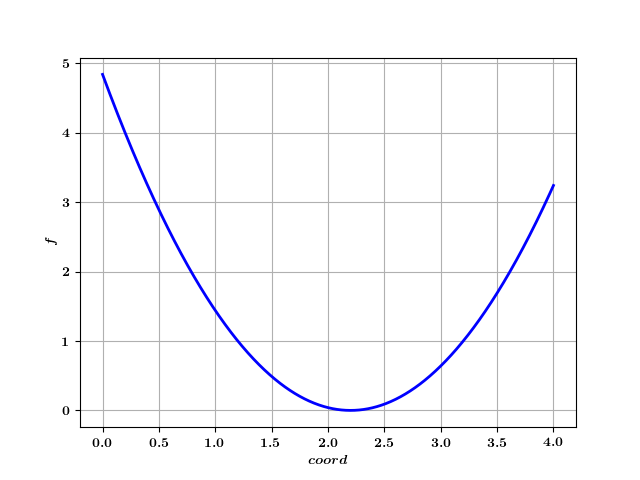


initial parameters: 
[4.840000000000001, -4.4, 1.0, 0.0]



<IPython.core.display.Javascript object>


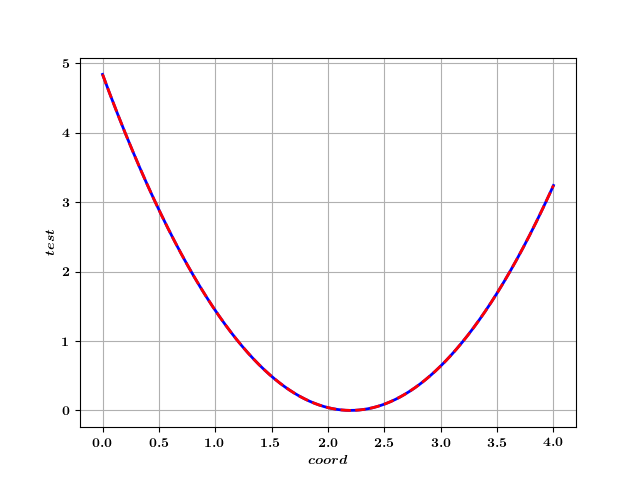

In [26]:
# -----------------------------------------------
# --- Test the first derivative ---
# -----------------------------------------------
mix.reload_module(mix)
mix.reload_module(bfgs)

# desired absolute error in the prediction of the minimum of the cost function;
# i.e. error in the prediction how close the derivative of the cost function to the zero.
eps = 0.1 
N_coord_ = 1024
coord_ = np.linspace(0, 4., N_coord_)

m_pairs_ = 2 

# --- Choose reference data (denoted as f_ref) ---
# In a real example, it is a set of given pairs (f, coord) which should be approximated by a polynomial.
alpha = -2.2
ampl_noise = 0.0
f_given_ = (coord_ + alpha)**2 + ampl_noise*(1 - 2.*np.random.rand(N_coord_)) # 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(coord_, f_given_, color='b', linewidth = 2, linestyle='-')
plt.xlabel('$coord$')
plt.ylabel("$f$")
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------
# --- Choose test function for x and the ansatz for the parameters ---
N_pars_ = 4

# *** ansatz (initial parameters) ***
# pars_ = np.random.rand(N_pars_)
pars_ = [alpha**2, 2*alpha, 1.0, 0.0]

print("\ninitial parameters: ")
print(pars_)
print()

# test function:
f_test_ = compute_test_function()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(coord_, f_given_, color='b', linewidth = 2, linestyle='-', label = "goal")
ax.plot(coord_, f_test_,  color='r', linewidth = 2, linestyle='--',  label = "test")
plt.xlabel('$coord$')
plt.ylabel("$test$")
plt.grid(True)
plt.show()
    
# cost function:
F_cost = compute_cost_function()

del alpha

In [7]:
# -----------------------------------------------------
# --- Analyse the Hessian ---
# -----------------------------------------------------
from scipy.linalg import eig

H = form_hessian()

eig_values, eig_vectors = eig(H)


In [8]:
H

array([[   2048.   ,    4096.   ,   10928.005,   32800.031],
       [   4096.   ,   10928.005,   32800.031,  105011.367],
       [  10928.005,   32800.031,  105011.367,  350208.834],
       [  32800.031,  105011.367,  350208.834, 1201302.29 ]])

In [9]:
eig_values

array([1.314e+06+0.j, 5.027e+03+0.j, 4.044e+02+0.j, 1.849e+01+0.j])

In [25]:
# -----------------------------------------------------
# --- Compure the first derivative ---
# -----------------------------------------------------
norm_der = 0
for i_par in range(N_pars_):
    norm_der += np.abs(der_1st_cost(i_par))
norm_der = norm_der / N_coord_
    
print(norm_der)
    
del i_par

1.6291092282993962e-14


In [12]:
len(norm_der)

1024